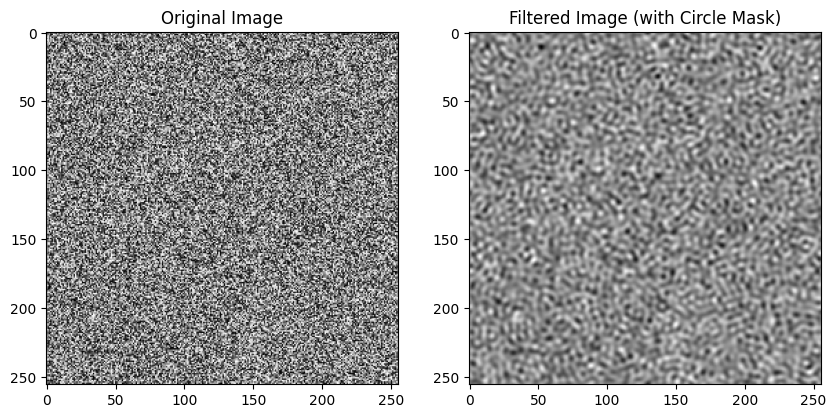

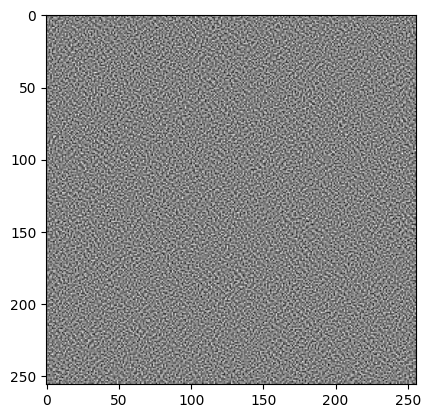

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Function to create a circular mask
def create_circle_mask(image_shape, radius):
    rows, cols = image_shape
    center = (rows // 2, cols // 2)
    y, x = np.ogrid[:rows, :cols]
    mask = (x - center[1])**2 + (y - center[0])**2 <= radius**2
    return mask.astype(float)

# Function to apply FFT and circular mask
def apply_fft_mask(image, radius):
    # Perform FFT
    fft_image = fft2(image)
    
    # Create circular mask
    mask = create_circle_mask(image.shape, radius)
    
    # Apply the mask in the frequency domain
    fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to center
    fft_image_shifted *= mask  # Multiply in the frequency domain
    
    # Inverse FFT to get the filtered image
    filtered_image = np.abs(ifft2(np.fft.ifftshift(fft_image_shifted)))  # Inverse FFT with shift
    return filtered_image

# Example usage with a random image
image = np.random.rand(256, 256)  # Example random image (replace with actual image)
radius = 50  # Set the radius for the circular mask

# Apply the FFT-based mask and get the filtered image
filtered_image = apply_fft_mask(image, radius)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Filtered Image (with Circle Mask)")
plt.imshow(filtered_image, cmap='gray')
plt.show()


# Create a low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.uint8)
r = image.shape[0]//2  # Radius of the low-pass filter
y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]
mask[(x*x + y*y) <= r*r] = 1

# Apply mask to FFT
fft_image = fft2(image)
filtered_fft_image = fft_image * mask

# Inverse FFT to get filtered image
filtered_image = ifft2(filtered_fft_image).real
plt.imshow(np.real(filtered_fft_image), cmap='gray')
plt.imshow(np.real(np.fft.ifft2(filtered_fft_image)), cmap='gray')